<a href="https://colab.research.google.com/github/juandiego2205/Biosenales/blob/main/Proyecto_4/Introduccion_NeuroKit2_UDEA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuroKit2

## Table of Contents
1. Introducción
2. Environment Setup
3. Signals
4. Processing or Analysis
5. Getting Started



## 1. Introducción




NeuroKit2 is an open-source Python toolbox designed for neurophysiological signal processing. It simplifies the analysis of physiological data, such as electroencephalography (EEG), electrodermal activity (EDA), and heart rate variability (HRV), among others. With its user-friendly functions, NeuroKit2 allows researchers and practitioners to preprocess signals, extract meaningful features, and visualize results efficiently.


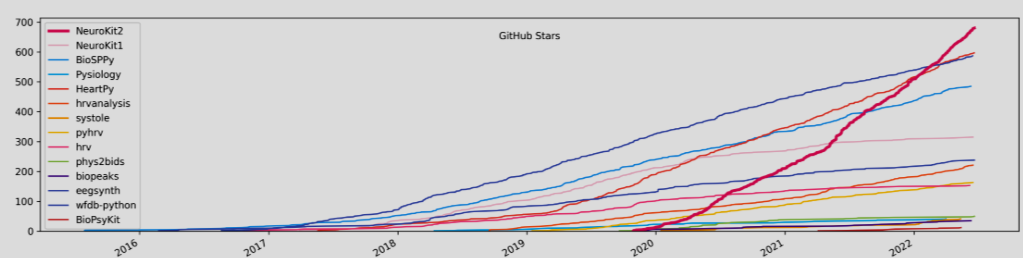

https://link.springer.com/article/10.3758/s13428-020-01516-y

##2. Environment Setup

In [ ]:
# Install NeuroKit2
!pip install neurokit2
#if you use Conda,  conda install -c conda-forge neurokit2

# Import necessary libraries
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization in plots
%matplotlib inline
sns.set(style="whitegrid")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 9.9 MB/s eta 0:00:00


## 3. Signals

###Cardiac Activity (ECG)

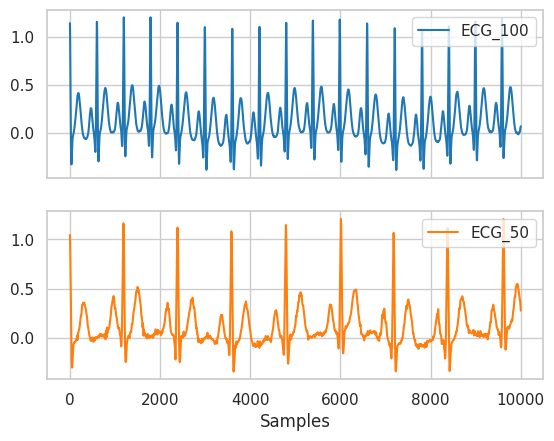

In [ ]:
# Alternate heart rate and noise levels
ecg50 = nk.ecg_simulate(duration=10, noise=0.05, heart_rate=50)
ecg100 = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)
# https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-simulate
# Visualize
ecg_df = pd.DataFrame({"ECG_100": ecg100, "ECG_50": ecg50})

nk.signal_plot(ecg_df, subplots=True)

### Electromyography (EMG)

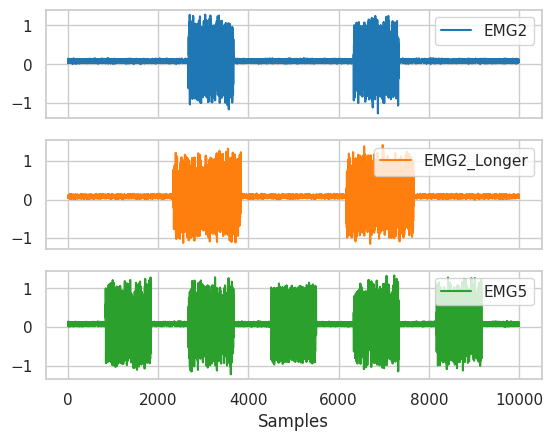

In [ ]:
# Simulate
emg2 = nk.emg_simulate(duration=10, burst_number=2, burst_duration=1.0)
emg2_long = nk.emg_simulate(duration=10, burst_number=2, burst_duration=1.5)
emg5 = nk.emg_simulate(duration=10, burst_number=5, burst_duration=1.0)

# Visualize
emg_df = pd.DataFrame({"EMG2": emg2,
                       "EMG2_Longer": emg2_long,
                       "EMG5": emg5})
nk.signal_plot(emg_df,subplots=True)

### Electrodermal Activity (EDA)

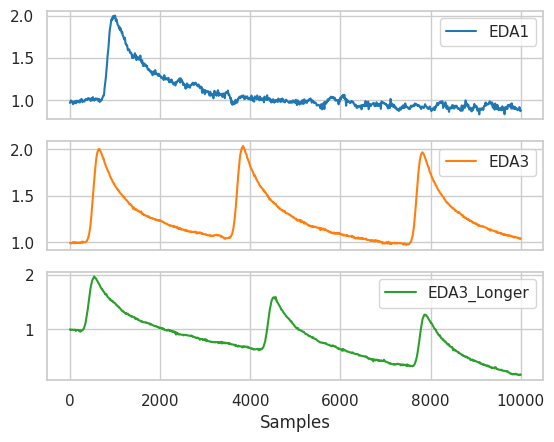

In [ ]:
# Simulate
eda1 = nk.eda_simulate(duration=10, scr_number=1, drift=-0.01, noise=0.05)
eda3 = nk.eda_simulate(duration=10, scr_number=3, drift=-0.01, noise=0.01)
eda3_long = nk.eda_simulate(duration=10, scr_number=3, drift=-0.1, noise=0.01)

# Visualize
eda_df = pd.DataFrame({"EDA1": eda1,
                       "EDA3": eda3,
                       "EDA3_Longer": eda3_long})
nk.signal_plot(eda_df, subplots=True)

##4. Processing or Analysis

## Interval-related Analysis

In [ ]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd

Index(['ECG', 'PPG', 'RSP'], dtype='object')
(30000, 3)
Index(['ECG_Raw', 'ECG_Clean', 'ECG_Rate', 'ECG_Quality', 'ECG_R_Peaks',
       'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks',
       'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks',
       'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
       'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
       'ECG_Phase_Completion_Ventricular'],
      dtype='object')
(30000, 19)


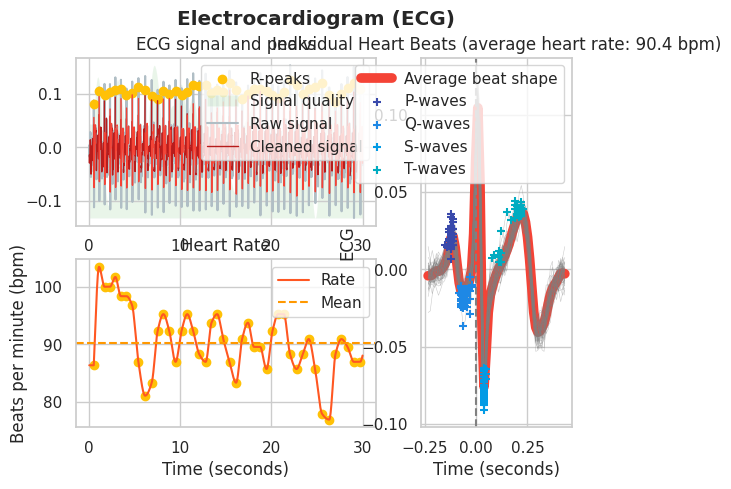

In [ ]:
# Download example data
# Get data
# bio_resting_5min_100hz - Resting-state of 5 min (pre-cropped, with some ECG noise towards the end)
data = nk.data("bio_resting_5min_100hz")
print(data.columns)
print(data.shape)

# Process ecg
# ecg_process(ecg_signal, sampling_rate=1000, method='neurokit')
# ecg_signals (DataFrame) – A DataFrame of the same length as the ecg_signal
ecg_signals, info = nk.ecg_process(data["ECG"], sampling_rate=100)
print(ecg_signals.columns)
print(ecg_signals.shape)

nk.ecg_plot(ecg_signals[:3000], info)
#https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-plot

In [ ]:
ECG_feature=nk.ecg_intervalrelated(ecg_signals)
print(ECG_feature.columns)
print(ECG_feature.shape)
# Returns DataFrame – A dataframe containing the analyzed ECG feature
# https://neuropsychology.github.io/NeuroKit/functions/ecg.html#neurokit2.ecg.ecg_intervalrelated

Index(['ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1',
       'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD',
       'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN',
       'HRV_MCVNN', 'HRV_IQRNN', 'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN',
       'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI',
       'HRV_TINN', 'HRV_ULF', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF',
       'HRV_TP', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'HRV_SD1',
       'HRV_SD2', 'HRV_SD1SD2', 'HRV_S', 'HRV_CSI', 'HRV_CVI',
       'HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS', 'HRV_PSS', 'HRV_PAS',
       'HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C1a',
       'HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a',
       'HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_DFA_alpha1',
       'HRV_MFDFA_alpha1_Width', 'HRV_MFDFA_alpha1_Peak',
       'HRV_MFDFA_alpha1_Mean', 'HRV_MFDFA_alpha1_Max',
       'HRV_MF

### Segmenting the Data

In [ ]:
# Half the data
#epochs_create(data, events=None, sampling_rate=1000, epochs_start=0,
#epochs_end='from_events', event_labels=None, event_conditions=None, baseline_correction=False)
epochs = nk.epochs_create(ecg_signals,
                          events=[0, 15000],
                          sampling_rate=100,
                          epochs_start=0,
                          epochs_end=150)
#Returns dict – A dict containing DataFrames for all epochs.
print(epochs.keys())
print(epochs["1"].shape)

dict_keys(['1', '2'])
(15000, 21)


In [ ]:
# Analyze
nk.ecg_intervalrelated(epochs)

,Label,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
1,1,86.389814,[[69.49767441860465]],[[5.167181138835641]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],...,[[1.2527629684953678]],[[4.290505175709077]],[[1.1667625041387146]],[[1.3234302834078784]],[[1.3340298186240032]],[[1.5730504365078102]],[[1.6535777692661096]],[[1.8035044265520663]],[[2.336829556302458]],[[0.8288764443746864]]
2,2,86.394396,[[69.46046511627907]],[[4.648089725942579]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],...,[[1.8817856208857746]],[[4.080221616903997]],[[1.3473463161429124]],[[1.7371494891482802]],[[1.4976794053994398]],[[1.9578060920316949]],[[1.5369379755191364]],[[1.8952794259141006]],[[3.094110204759245]],[[0.9730288694833277]]


## Customize your Processing Pipeline

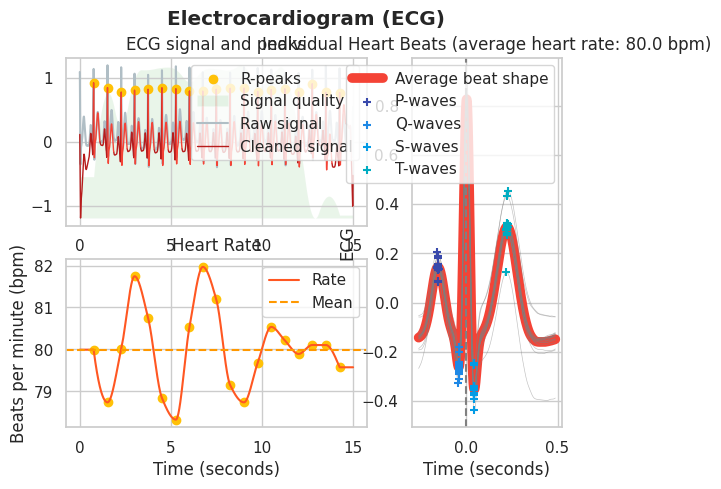

In [ ]:
# Simulate ecg signal (you can use your own one)
ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80)

# Default processing pipeline
signals, info = nk.ecg_process(ecg, sampling_rate=1000)

# Visualize
nk.ecg_plot(signals, info)

###Building your own process() function

In [ ]:
# Define a new function
def my_processing(ecg_signal):
    # Do processing
    ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=1000)
    #fFind R-peaks in an ECG signal
    # Returns signals (DataFrame) – A DataFrame of same length as the input signal in which
    #occurrences of R-peaks marked as 1 in a list of zeros with the same length as ecg_cleaned.
    # info (dict) – A dictionary containing additional information,
    #in this case the samples at which R-peaks occur
    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)

    # Calculate signal rate (per minute) from a series of peaks
    # Returns array – A vector containing the rate (peaks per minute).
    rate = nk.ecg_rate(rpeaks, sampling_rate=1000, desired_length=len(ecg_cleaned))

    # array or str – Vector containing the quality index ranging from 0 to 1
    #for "averageQRS" method, returns string classification (Unacceptable,
    # Barely acceptable or Excellent) of the signal for "zhao2018" method.
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=1000)


    # Prepare output
    signals = pd.DataFrame({"ECG_Raw": ecg_signal,
                            "ECG_Clean": ecg_cleaned,
                            "ECG_Rate": rate,
                            "ECG_Quality": quality})
    signals = pd.concat([signals, instant_peaks], axis=1)

    # Create info dict
    info = rpeaks
    info["sampling_rate"] = 1000

    return signals, info

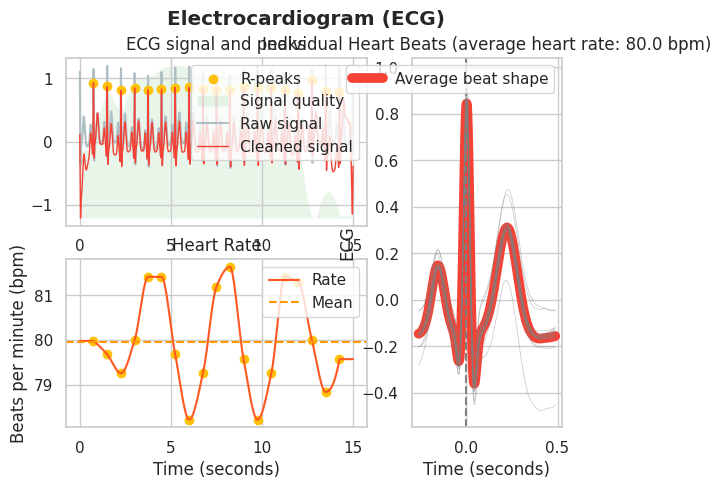

In [ ]:
# Process the signal using previously defined function
signals, info = my_processing(ecg)

# Visualize
nk.ecg_plot(signals, info)

In [ ]:
# Define a new function
# First, let’s look at the documentation for ecg_clean(), you can see that they are several different methods
#for cleaning which can be specified. The default is the NeuroKit method, however depending on the quality of your signal (and several
#other factors), other methods may be more appropriate. It is up to you to make this decision.
def my_processing(ecg_signal):
    # Do processing
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=1000, method="engzeemod2012")
    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)
    rate = nk.ecg_rate(rpeaks, sampling_rate=1000, desired_length=len(ecg_cleaned))
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=1000)

    # Prepare output
    signals = pd.DataFrame({"ECG_Raw": ecg_signal,
                            "ECG_Clean": ecg_cleaned,
                            "ECG_Rate": rate,
                            "ECG_Quality": quality})
    signals = pd.concat([signals, instant_peaks], axis=1)

    # Create info dict
    info = rpeaks
    info["sampling_rate"] = 1000

    return signals, info

In [ ]:
def my_cleaning(ecg_signal, sampling_rate):
    detrended = nk.signal_detrend(ecg_signal, order=1)
    cleaned = nk.signal_filter(detrended,
                               sampling_rate=sampling_rate,
                               lowcut=2,
                               highcut=9,
                               method='butterworth')
    return cleaned

In [ ]:
# Define a new function
def my_processing(ecg_signal):
    # Do processing
    ecg_cleaned = my_cleaning(ecg_signal, sampling_rate=1000)
    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)
    rate = nk.ecg_rate(rpeaks, sampling_rate=1000, desired_length=len(ecg_cleaned))
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=1000)

    # Prepare output
    signals = pd.DataFrame({"ECG_Raw": ecg_signal,
                            "ECG_Clean": ecg_cleaned,
                            "ECG_Rate": rate,
                            "ECG_Quality": quality})

    signals = pd.concat([signals, instant_peaks], axis=1)

    # Create info dict
    info = rpeaks
    info["sampling_rate"] = 1000

    return signals, info

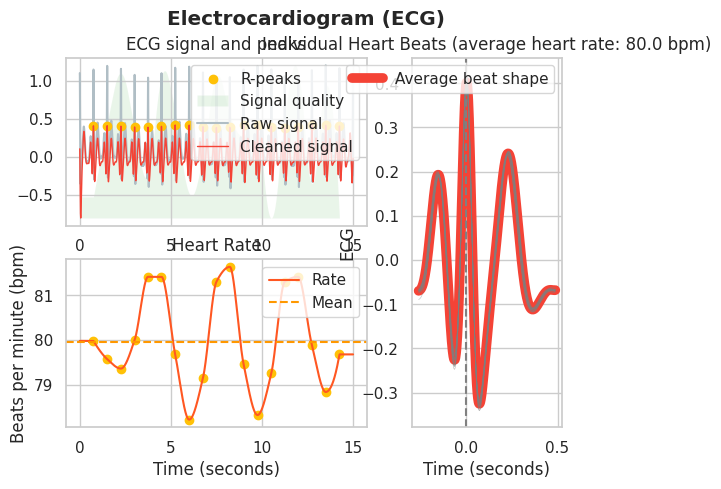

In [ ]:
# Process the signal using previously defined function
signals, info = my_processing(ecg)

# Visualize
nk.ecg_plot(signals, info)

## Heart Rate Variability (HRV)

In [ ]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = nk.data("bio_resting_5min_100hz")
data.head() # print the first 5 rows

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669


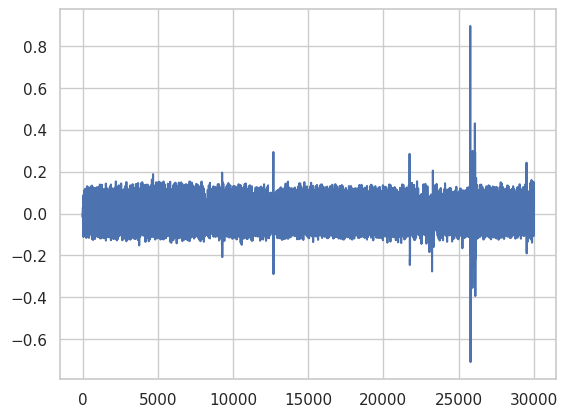

In [ ]:
plt.plot(data["ECG"])
peaks, rate = nk.ecg_peaks(data["ECG"],sampling_rate=100) #extract peak and rate of ECG signal

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,...,60.0,0.891502,660.0,740.0,14.651163,49.302326,470.0,1420.0,7.962963,234.375


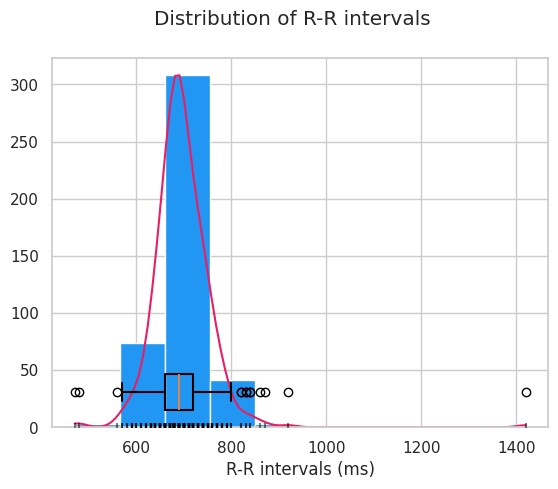

In [ ]:
# Extract clean EDA and SCR features
# If you want to see the features means; https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-time
hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_time

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,0.01731,0.048026,0.060232,0.011186,0.136754,0.797353,0.351186,0.44044,-2.809554


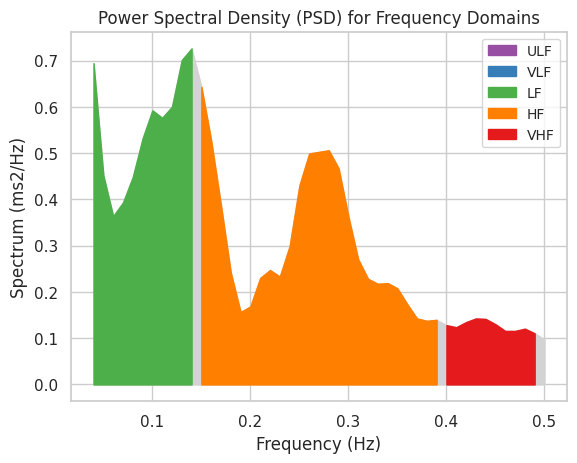

In [ ]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=100, show=True, normalize=True)
hrv_freq
# https://neuropsychology.github.io/NeuroKit/functions/hrv.html#neurokit2.hrv.hrv_frequency

#Frequency-domain HRV parameters analyze power in specific bands: **ULF**, **VLF**, **LF**, **HF**, and **VHF**,
#reflecting autonomic nervous system activity (e.g., stress, recovery). Ratios (e.g., **LF/HF**) and normalized metrics
#(**LFn**, **HFn**) highlight sympathovagal balance, while **TP** represents overall variability.
#The U (Ultra-Low Frequency) and V (Very-Low Frequency)

,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,49.341281,72.597435,0.679656,11253.343336,1.471333,4.758252,427.259889,0.55814,0.511688,0.736041,...,1.259931,4.282683,1.063533,1.266877,1.446925,1.63037,1.209752,1.856372,1.913071,0.854475


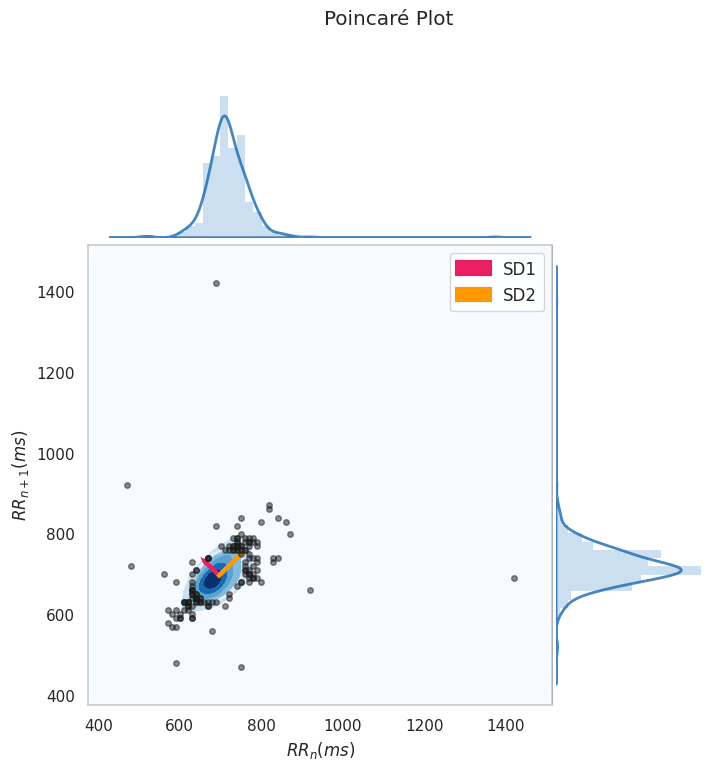

In [ ]:
hrv_nonlinear = nk.hrv_nonlinear(peaks, sampling_rate=100, show=True)
hrv_nonlinear
# https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-nonlinear

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,...,1.259931,4.282683,1.063533,1.266877,1.446925,1.63037,1.209752,1.856372,1.913071,0.854475


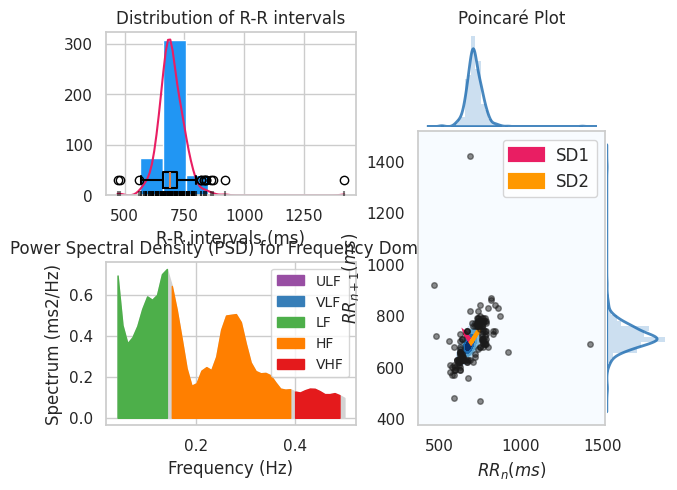

In [ ]:
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
hrv_indices

## Locate P, Q, S and T waves in ECG

In [ ]:
# Retrieve ECG data from data folder
ecg_signal = nk.data(dataset="ecg_1000hz")
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)

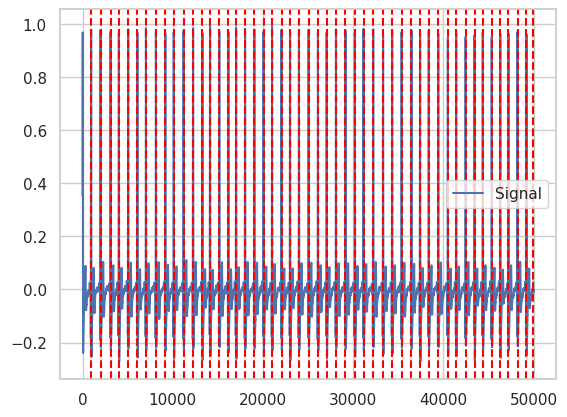

In [ ]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

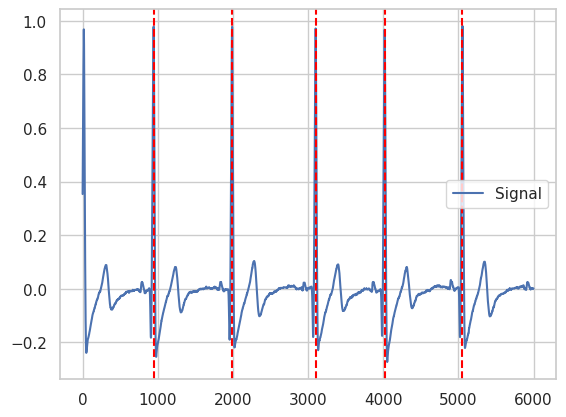

In [ ]:
# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:6000])

#### Locate other waves (P, Q, S, T) and their onset and offset
#### Peak method

In [ ]:
# Delineate the ECG signal
# https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-delineate
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=1000, method="peak")


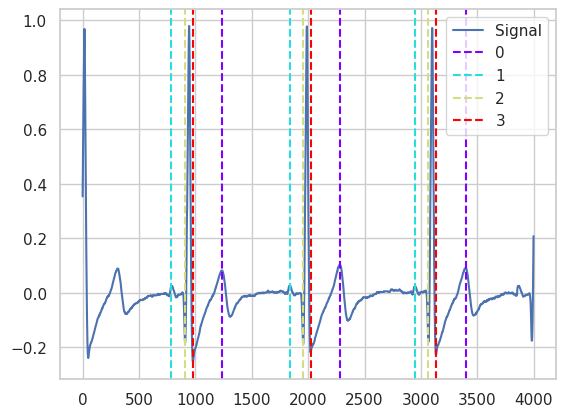

In [ ]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:4000])
# returns waves (dict) – A dictionary containing additional information. For derivative method, the dictionary contains
# the samples at which P-peaks, Q-peaks, S-peaks, T-peaks, P-onsets and T-offsets occur

# signals (DataFrame) – A DataFrame of same length as the input signal in which occurrences of peaks

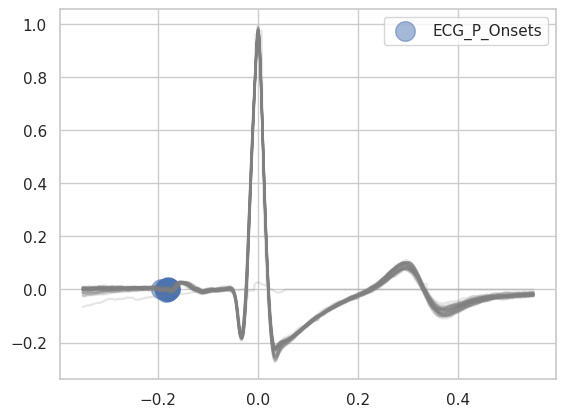

In [ ]:
# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal,
                                           rpeaks,
                                           sampling_rate=1000,
                                           method="peak",
                                           show=True,
                                           show_type='bounds_P')

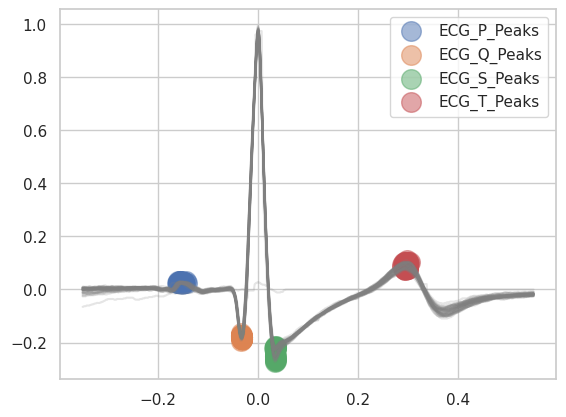

In [ ]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal,
                                 rpeaks,
                                 sampling_rate=1000,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

####Let’s next take a look at the continuous wavelet method.

In [ ]:
pip install PyWavelets

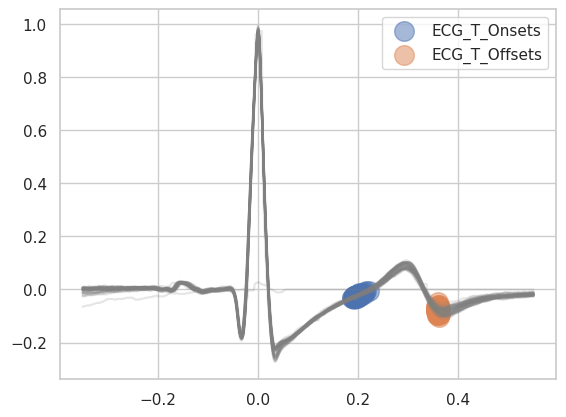

In [ ]:
# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=1000,
                                         method="cwt",
                                         show=True,
                                         show_type='bounds_T')

Unlike the peak method, the continuous wavelet method does not idenfity the Q-peaks and S-peaks. However, it provides more information regarding the boundaries of the waves

#### Discrete Wavelet Method (DWT)

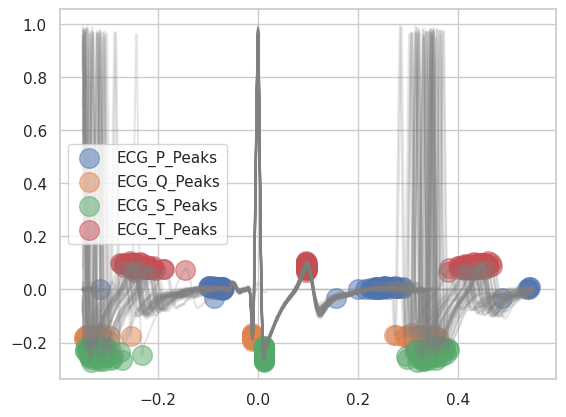

In [ ]:
# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal,
                                         rpeaks,
                                         sampling_rate=3000,
                                         method="dwt",
                                         show=True,
                                         show_type='peaks')

Visually, from the plots above, the delineated outputs of DWT appear to be more accurate than CWT, especially for the P-peaks and P-wave boundaries.

Overall, for this signal, the peak and DWT methods seem to be superior to the CWT.

##5. Getting Started
###To create this Colab notebook:

Open Google Colab:

Go to Google Colab and create a new notebook.
Set Up the Environment:

Copy the Setting Up the Environment section into a new code cell and execute it to install and import NeuroKit2 and other necessary libraries.
Add Sections:

Use markdown cells to add the remaining sections (Introduction, Signlas, proccesing , analysis etc.) and corresponding code cells with the provided code snippets.
Run and Experiment:

Execute each cell sequentially to see NeuroKit2 in action. Feel free to modify the code, use different sample datasets, or apply NeuroKit2 to your own data.

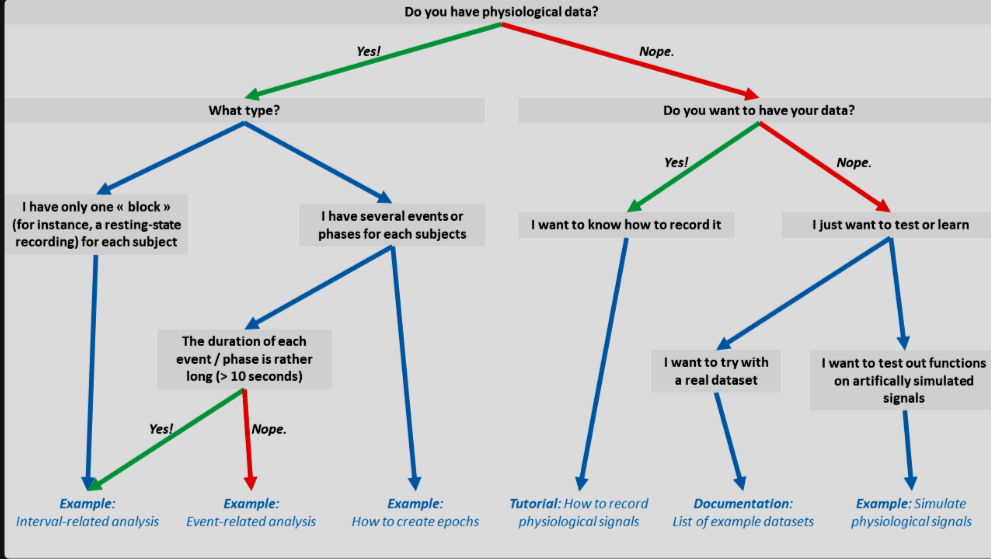

https://neuropsychology.github.io/NeuroKit/examples/index.html

https://neuropsychology.github.io/NeuroKit/codebook.html

